In [1]:
# Notebook dependencies
import os
import pandas as pd
import numpy as np
from IPython.display import display
from itertools import product as combine
from testing import run_tests
from search import breadth_first_graph_search

# **Project 1 - Search-based solutions for static Pac-Man game**
**Subject:** MC906/MO416 - Introduction to Artificial Intelligence 

**Authors:**

    Daniel Helú Prestes de Oliveira - RA 166215
    Eduardo Barros Innarelli        - RA 170161
    Matheus Rotta Alves             - RA 184403
    Victor Ferreira Ferrari         - RA 187890
    Vinícius Couto Espindola        - RA 188115


## **Usage**
> TODO List:
- [ ] Imports
- [ ] Description of used libraries.
- [ ] Add AIMA to notebook.
- [ ] ???

In [2]:
import numpy as np
from SearchAgent import SearchAgent

## **Problem**

> TODO List:
- [X] Problem description 
- [ ] Problem modeling
- [X] Search agent (motivation, API)

### **Motivation**
Consider the Pacman video game. We're given a maze where each position can have one of the following: start (unique), goal (unique), enemy, dots, walls or empty spaces. The pacman will begin the game in the start position and will try to reached the goal position only crossing through empty spaces and dots positions. In the event were pacman reaches outside the map, it's position is "wrapped around" the map, meaning that it will appear on the oposite side of the map maintaining one of it's coodinates.
When compared to the original game, some simplifications were made: 
 - Ghosts do not move during the pacmans search (their initial position is their only position) 
 - Berries were removed from the game, therefore Pacman has no countermeasure against ghosts.

### **Details and Environment**
 For every move pacman makes, it will pay a cost of 1 point, however, if a dot is found, it will receive a payment of 10 points. The sum of all costs and payments will be considered the score achieve by Pacman when executing a certain path. Also, Pacman can only move one position at a time. 
Based on such maze and restrictions, we must seek the best feasible path for Pacman to reach the goal. In our case, "best" refers to the path in which we achieve the highest score.

**Environment:** Is the maze described by the problem.

**Actuator:** The only action allowed to pacman is to move to a neighbor cel in the maze given the problems restrictions.

**Sensors:** We consider that pacman can "see" the entirety of the given maze.

**Known:** The consquences to the environment given an action are completely predictable.

**Environment Properties:**
 - **Fully observable:** We can see the entire maze.
 - **Deterministic:** The next state is entirely defined by the current state an a possible action on it.
 - **Static:** The only change that occurs within the maze is cause by Pacman himself, the ghosts do not act.
 - **Discrete:** The environment has a finite number of states, being a finite maze with finite resources.
 - **Single Agent:** The only agent within the problem is Pacman.
 - **Sequential:** Every step builds on the previous ones to traverse the state space.

### **Models**
TODO

 ## **Search Agent**

### **Motivation**
This project consists of different search solutions for the same few problem models, and most methods use the same data structures. In that sense, the logical step to take is to create a shared API for every method, so that the environment is the same for every method, standardizing testing and result analysis. This agent should be able to formulate any of the problem models, change problem variables/properties and provide an API for result analysis.


### **API**
The SearchAgent class can be seen in the next cell:

In [6]:
%psource SearchAgent

The SearchAgent lets the user:
\begin{itemize}
\item Find the initial and goal positions of a maze from a standard as seen in the next section;
\item Formulate any of the problem models, given an initial position, a goal position, goal conditions and flags indicating the model to use;
\item Change the maze without changing the problem;
\item Formulate a new problem with the same maze;
\item Use any search method from AIMA and store its return object;
\item Get the solution (sequence of actions or path);
\item Get the solution path;
\item Get the final score from the solution;
\item Visualize the solution in ASCII form, returning a NumPy array with the maze modified with the taken path;
\item Use an animation engine created in _pygame_ to animate the final path.
\end{itemize}

Therefore, it accomplishes its objective of providing a generic environment to run tests and solve the problem. 

## **Test Cases**

> TODO List:
- [ ] Maybe show two examples (one dense and it's correspondent sparse)

For testing purposes, we generated 10 mazes using the [tool provided by classmate Gabriel Bomfim](https://gabomfim.github.io/pacman-mazegen/tetris/many.htm) in Google Classroom, which adapts the [maze generator](https://shaunlebron.github.io/pacman-mazegen/) linked in the project description. Each tile is represented by a char, where **|** and **-** are walls, **.** are foods and **o** are ghosts. For each maze, we choosed three start and goal positions, respectively symbolized by **!** and **?**.

As this tool creates mazes fully filled with food, we thought that it would be good for comparision to also test sparse mazes, which we created by randomly removing dots in the dense ones. These variations, together with the originals, give us a total of 60 mazes, stored in `./mazes` directory.

The tests were run with the SearchAgent class defined in the previous section.

In [5]:
# Getting test files
path = 'mazes/'
sizes = ['dense/','sparse/']
maze = ['1','2','3','4','5','6','7','8','9','10']
pos = ['a','b','c']
test_files = [path+s+i+l for (s,i,l) in list(combine(sizes,maze,pos))]

## **Solution Visualization**
In order to create a nice way to visualize each search behaviours, we used PyGame library visual interface to draw the maze with the Pacman's path. This was achieved by using trasnforming the matrix with the maze in a matrix which mapped the display pixels. For the creation and manipulation of such we defined a class PacScreen which serves as an interface between the search agent and the screen.

To create the pixels map we simply represent each position of the matrix with a offset defined as `px=28` in PacScreen. This alllows us to have a `px` square block to draw the contents of each position. To reference the block, we simply use the matrix indexes which holds the desired content and multiply then by `px`, this gives us the lower left vertex of the corresponding block. However, since matrices are indexed as `M[i,j]`, where `i` is the line and `j` the column and the display is indexed with cartesian coordinates `(x,y)`, we must map the indexes `i` and `j` to `y` and `x`, respectively.

The PacScreen class works through the following steps: 
 * First we initialize the class by setting essential parameters such as: a copy of the maze to be used as reference, the size o the screen considering how many pixels each block will hold, the Pacman's initial position and the goal position.
 * Once we've ran a seach with the same maze passed to PacScreen, we create a sequence of indexes which indicate the Pacman's path in the maze. This sequence is then passed to the `PacScreen.run()` function which will draw the maze for each of the steps taken by Pacman.
 * Inside the `run()` fucnction, we fist draw the starting environment with `PacScreen.draw()`. Then, every `interval=0.005` seconds we update the display with the next position using `PacScreen.update()`.
 
**Note:** PyGame provides funcions which allows us to draw circles, rectangle and polygons, these were used to represent the map contained in the matrix. The walls are blocks filled with blue rectangles, the ghosts are triangles, the goal is a red circle, the dots are white circles and Pacmand is represented by the yellow circle.
> TODO List:
- [ ] Maybe put this after all the methods?


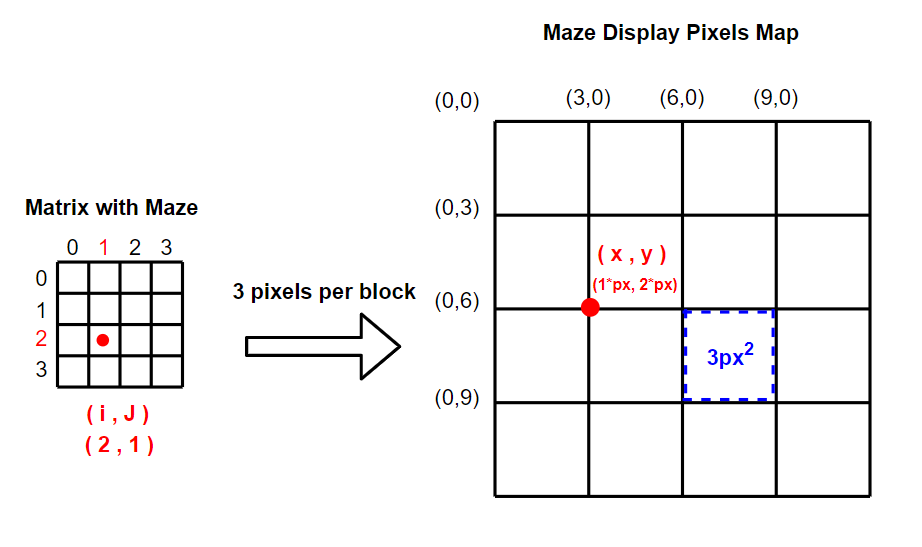

In [9]:
from IPython.display import Image
Image(filename='images/display_transform.png') 

## **Uninformed Search Methods**
The Uninformed Search Methods, also known as Blind Search Methods, are algorithms that are given no information about the problem other than its definition. They are only able to generate possible successors of a state and analyze these sucessors in a sequence according to the algorithm applied. They analyze each successor created until it finds the goal state. Every state receives the same treatment, and every decision is local according to a method that can only use local information of the problem (if any).

### **Breadth-First Search (BFS) Solution**
###### **Responsible:** Victor

> TODO List:
- [X] Short theoretical introduction
- [X] Run tests script with and without maze in state
- [ ] Results table 
- [ ] Analysis with relevant(s) animation(s)

#### **The Method**
Breadth-First Search (BFS) is an Uninformed Search method that visits every state in order of distance from the initial state. So this method expands every successor once it reaches a node, and then visits each one of them in a predetermined order in a queue (FIFO). In the _AIMA_ library, this is done in the order of actions given by the problem.

BFS, for the Pac-Man problem, is a complete method, since the maze is finite and in the **graph** variation the method does not visit the same state twice. The graph variation is used because there can be loops in the state space, so a tree is not the best representation of it. This method always gets the shortest path to the goal position, but it is **not** an optimal method for the problem, because not all paths have the same cost, eating more dots will result in better solutions.

This method is **exact and deterministic**, so it will **always** return the same solution to an instance. For that reason, there's no use in averaging results from different executions, and the method can be analyzed with only one execution.

#### **Pre-Analysis**
Since this method always expands the shallowest node, memory and time can be a big problem, so problems with less successors in each node and/or shallower trees can make a huge difference in these constraints. For that reason, between the two models created for the problem, the one that does not have the maze in its state is the likely best one for this method. 

Since BFS always finds the shortest path to the goal and always visits the shallowest node available, it will never need to check the same position twice. It will go through every position in the maze in order of proximity to the initial point, eventually getting to the goal without needing to cross a taken path. So the quadratic state space of the model with only the position as state will likely get the same answer as the exponential state space of the other model, but faster.

And this increase in speed (and memory usage) can be pivotal, for this method can easily explode in time and memory with the more complex model. However, this likely behavior also hints that the result will not include a very high score, because the path cost is not considered at all in this method.

#### **Results for Model Without Maze in State**

In [ ]:
def bfs_pathcost_no_maze(agent, maze, init, goal, *args):
    agent.formulate_problem(init, goal, False, False, [b'-', b'|', b'o', b'_'])
    agent.search(breadth_first_graph_search)
    return agent.get_score()

# Run all tests
dataframes = run_tests(
    test_files, 
    bfs_pathcost_no_maze, 
    [], 
    repeat=1, 
    out_path='data/bfs/problem1'
)

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### **Results for Model With Maze in State**

CAUTION: the below cell can take a really long time to run, and use a lot of RAM.

In [ ]:
def bfs_pathcost_with_maze(agent, maze, init, goal, *args):
    agent.formulate_problem(init, goal, True, False, [b'-', b'|', b'o', b'_'])
    agent.search(breadth_first_graph_search)
    return agent.get_score()

# Run all tests
dataframes = run_tests(
    test_files, 
    bfs_pathcost_with_maze, 
    [], 
    repeat=1, 
    out_path='data/bfs/problem2'
)

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### **Analysis**
TODO

### **Depth-First Search Solution**
###### **Responsible:** Daniel

> TODO List:
- [X] Short theoretical introduction
- [ ] Run tests script with and without maze in state
- [ ] Results table 
- [ ] Analysis with relevant(s) animation(s)

The Depth-First Search is an Uninformed Search method that expands its deepest node possible first, the one that has no sucessor. If the node is the goal state, it has found the path to the solution, otherwise it goes back to the most recent ancestor node that still has successor that were not expanded and it expands the deepest sucessor this ancestor node has.

For the Pacman Problem the goal state considered for the problem was the final position that pacman should go. It did not consider analyzing all the possible outcomes of eating the dots to increase it points because the time and memory to consider all possible states would be exponential.

## **Informed Search Methods**

> TODO List:
- [ ] Short theoretical introduction

### **A* Search Solution**
###### **Responsible:** Eduardo

> TODO List:
- [X] Run tests script with and without maze in state
- [X] Results table
- [ ] Analysis with relevant(s) animation(s)

As an informed search algorithm, A\* takes into account information about the path cost together with an heuristic to evaluate which is the most promising path to take when it enters a state. For this evaluation, A\* chooses in state $n$ to proceed to the neighbor that gives the lowest $f(n) = g(n) + h(n)$, $g(n)$ being the exact path cost from starting state to $n$ and $h(n)$ the heuristic estimated cost from $n$ to goal state.

#### **Heuristic**

How fast the agent reaches the goal in A\* depends on the heuristic implemented and how it affects the nodes expansion. Without the maze in state this isn't that much of a concern, as for a $n\times m$ maze there can be up to $O(nm)$ states. It's pretty hard, though, to estimate a good cost to goal without the current configuration knowledge (the combinations of foods can make any estimation over the initial maze very far from optimal). To simplify, we use the **Manhattan distance** as a heuristic for this variation of the problem, which is the distance between the agent and the goal positions measured along axes at right angles (i.e., $|x_1 - x_2| + |y_1 - y_2|$, given that the agent is in $(x_1, y_1)$ and the goal is to reach $(x_2, y_2)$). It's a admissible heuristic as there can't be a shorten path from node to goal.

With maze in state it's specially important to pick a good heuristic - after all, the search space is exponentially large, as each subset of eaten food represents a different node even with the agent in a fixed position. Considering that in this case we have information that allows a more realistic approach, but keeping it simple in terms of code, we implement the sum of Manhattan distances between the agent and all the foods as a heuristic, as it's highly possible that most of them will be eaten in the optimal path. Notice that this sum can overestimate the optimal, because it's not always true that all the foods will be eaten in the best path. As a overestimating heuristic, it breaks admissibility - that is, A\* is not guaranteed to find the optimal path. Even so, as our problem gives a high score to Pac-Man when it eats, we chose it expecting A\* will find good paths in reasonable running times. 


In [3]:
from search import manhattan_distance

# Heuristic for problem 1 - without maze in state
def astar_heuristic_p1(node, goal):
    ''' manhattan distance between Pac-Man and goal '''
    
    idx = node.state
    md = manhattan_distance(goal, idx)
    return md

# Heuristic for problem 2 - with maze in state
def astar_heuristic_p2(node):
    ''' sum of manhattan distances between Pac-Man and all foods in maze '''
    
    # Detach maze configuration and Pac-Man position
    tuple_maze, idx = node.state
    
    # Accumulate sum of manhattan distances to foods
    md_sum = 0
    for food_idx in np.argwhere(maze == '.'):
        md_sum += manhattan_distance(food_idx, idx)
            
    return md_sum

#### **Results for problem without maze in state**

In [4]:
from search import astar_search

def astar_pathcost_p1(agent, maze, init, goal, *args):
    ''' triggers A* search and returns path cost '''
    agent.formulate_problem(init, goal, False, False, [b'-', b'|', b'o', b'_'])
    agent.set_heuristic(astar_heuristic_p1, True)
    agent.search(astar_search)
    return -1*agent.get_score()

# Run all tests
dataframes = run_tests(
    test_files, 
    astar_pathcost_p1, 
    [], 
    repeat=100, 
    out_path='data/astar/problem1'
)

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### Starting New Test Routine ####
[============================================================] 100.0% ...mazes/sparse/10c X 100

================ all_data ================



,type,id,class,time_100avg,cost_100avg,fails_100total
mazes/dense/1a,dense,1,a,0.000547,2.0,0.0
mazes/dense/1b,dense,1,b,0.000702,5.0,0.0
mazes/dense/1c,dense,1,c,0.001166,15.0,0.0
mazes/dense/2a,dense,2,a,0.001275,15.0,0.0
mazes/dense/2b,dense,2,b,0.002281,24.0,0.0
mazes/dense/2c,dense,2,c,0.001611,17.0,0.0
mazes/dense/3a,dense,3,a,0.000402,3.0,0.0
mazes/dense/3b,dense,3,b,0.000691,5.0,0.0
mazes/dense/3c,dense,3,c,0.004258,5.0,0.0
mazes/dense/4a,dense,4,a,0.002401,27.0,0.0


================ ids_means ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.000805     7.333333             0.0
       2      0.001723    18.666667             0.0
       3      0.001784     4.333333             0.0
       4      0.002494    20.000000             0.0
       5      0.001690    14.666667             0.0
       6      0.001763    16.333333             0.0
       7      0.002023    18.000000             0.0
       8      0.001260    13.666667             0.0
       9      0.001413    14.000000             0.0
       10     0.001376    12.666667             0.0
sparse 1      0.000813     7.333333             0.0
       2      0.001568    18.666667             0.0
       3      0.001762     4.333333             0.0
       4      0.002265    20.000000             0.0
       5      0.001584    14.666667             0.0
       6      0.001651    16.333333             0.0
       7      0.001997    18.000000             0.0
       8      0.001361    13.666667             0.0
       9      0.001544    14.000000             0.0
       10     0.001278    12.666667             0.0

================ ids_max ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.001166         15.0             0.0
       2      0.002281         24.0             0.0
       3      0.004258          5.0             0.0
       4      0.003266         27.0             0.0
       5      0.002690         25.0             0.0
       6      0.002307         17.0             0.0
       7      0.003246         27.0             0.0
       8      0.001600         17.0             0.0
       9      0.002138         19.0             0.0
       10     0.002215         18.0             0.0
sparse 1      0.001109         15.0             0.0
       2      0.002146         24.0             0.0
       3      0.004201          5.0             0.0
       4      0.002814         27.0             0.0
       5      0.002566         25.0             0.0
       6      0.002256         17.0             0.0
       7      0.003119         27.0             0.0
       8      0.001597         17.0             0.0
       9      0.002506         19.0             0.0
       10     0.001792         18.0             0.0

================ ids_min ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.000547          2.0             0.0
       2      0.001275         15.0             0.0
       3      0.000402          3.0             0.0
       4      0.001814          8.0             0.0
       5      0.000413         -1.0             0.0
       6      0.001469         15.0             0.0
       7      0.001253          8.0             0.0
       8      0.000928          9.0             0.0
       9      0.000544          6.0             0.0
       10     0.000909          9.0             0.0
sparse 1      0.000598          2.0             0.0
       2      0.001035         15.0             0.0
       3      0.000483          3.0             0.0
       4      0.001728          8.0             0.0
       5      0.000534         -1.0             0.0
       6      0.001277         15.0             0.0
       7      0.001140          8.0             0.0
       8      0.001049          9.0             0.0
       9      0.000513          6.0             0.0
       10     0.001017          9.0             0.0

================ types_mean ================



,time_100avg,cost_100avg,fails_100total
type,,,
dense,0.001633,13.966667,0.0
sparse,0.001582,13.966667,0.0


================ types_max ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,10,0.004258,27.0,0.0
sparse,10,0.004201,27.0,0.0


================ types_min ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,1,0.000402,-1.0,0.0
sparse,1,0.000483,-1.0,0.0


#### **Results for problem with maze in state**

In [5]:
def astar_pathcost_p2(agent, maze, init, goal, *args):
    ''' triggers A* search and returns path cost '''
    agent.formulate_problem(init, goal, True, False, [b'-', b'|', b'o', b'_'])
    agent.set_heuristic(astar_heuristic_p2, False)
    agent.search(astar_search)
    return -1*agent.get_score()

# Run all tests, 
dataframes = run_tests(
        test_files, 
        astar_pathcost_p2, 
        [], 
        repeat=100, 
        out_path='data/astar/problem2'
        )

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### Starting New Test Routine ####
[============================================================] 100.0% ...mazes/sparse/10c X 100



,type,id,class,time_100avg,cost_100avg,fails_100total
mazes/dense/1a,dense,1,a,0.092422,-699.0,0.0
mazes/dense/1b,dense,1,b,0.362104,-1684.0,0.0
mazes/dense/1c,dense,1,c,0.129554,-783.0,0.0
mazes/dense/2a,dense,2,a,0.515533,-1610.0,0.0
mazes/dense/2b,dense,2,b,0.083073,-756.0,0.0
mazes/dense/2c,dense,2,c,0.326362,-1170.0,0.0
mazes/dense/3a,dense,3,a,0.031396,-223.0,0.0
mazes/dense/3b,dense,3,b,0.039664,-408.0,0.0
mazes/dense/3c,dense,3,c,0.201212,-1109.0,0.0
mazes/dense/4a,dense,4,a,0.162557,-1126.0,0.0


time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.194693 -1055.333333             0.0
       2      0.308323 -1178.666667             0.0
       3      0.090758  -580.000000             0.0
       4      0.109067  -814.000000             0.0
       5      0.176852 -1165.333333             0.0
       6      0.329159 -1446.333333             0.0
       7      0.260570 -1066.000000             0.0
       8      0.215008 -1237.666667             0.0
       9      0.379531 -1638.333333             0.0
       10     0.246251 -1147.333333             0.0
sparse 1      0.223051  -270.666667             0.0
       2      0.313207  -288.333333             0.0
       3      0.233696  -272.000000             0.0
       4      0.666431  -260.666667             0.0
       5      0.098814  -119.333333             0.0
       6      0.426127  -234.666667             0.0
       7      0.267079  -238.666667             0.0
       8      0.302092  -294.333333             0.0
       9      0.111069  -142.000000             0.0
       10     0.340504  -259.000000             0.0

time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.362104       -699.0             0.0
       2      0.515533       -756.0             0.0
       3      0.201212       -223.0             0.0
       4      0.162557       -385.0             0.0
       5      0.316421       -318.0             0.0
       6      0.558786       -903.0             0.0
       7      0.578019       -664.0             0.0
       8      0.338794       -886.0             0.0
       9      0.627444      -1470.0             0.0
       10     0.429537       -797.0             0.0
sparse 1      0.476163       -166.0             0.0
       2      0.444955       -162.0             0.0
       3      0.331256       -222.0             0.0
       4      1.379487       -188.0             0.0
       5      0.109212       -109.0             0.0
       6      0.760376       -138.0             0.0
       7      0.474853       -218.0             0.0
       8      0.457618       -201.0             0.0
       9      0.156904        -98.0             0.0
       10     0.552071       -162.0             0.0

time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.092422      -1684.0             0.0
       2      0.083073      -1610.0             0.0
       3      0.031396      -1109.0             0.0
       4      0.034420      -1126.0             0.0
       5      0.029865      -1769.0             0.0
       6      0.118374      -1817.0             0.0
       7      0.066045      -1797.0             0.0
       8      0.103441      -1675.0             0.0
       9      0.173608      -1731.0             0.0
       10     0.140572      -1801.0             0.0
sparse 1      0.064793       -416.0             0.0
       2      0.107802       -412.0             0.0
       3      0.149932       -307.0             0.0
       4      0.163969       -302.0             0.0
       5      0.079540       -130.0             0.0
       6      0.178887       -318.0             0.0
       7      0.079861       -260.0             0.0
       8      0.184870       -425.0             0.0
       9      0.037074       -164.0             0.0
       10     0.187347       -337.0             0.0

,time_100avg,cost_100avg,fails_100total
type,,,
dense,0.231021,-1132.900000,0.0
sparse,0.298207,-237.966667,0.0


,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,10,0.627444,-223.0,0.0
sparse,10,1.379487,-98.0,0.0


,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,1,0.029865,-1817.0,0.0
sparse,1,0.037074,-425.0,0.0


### **? Search Solution**
###### **Responsible:** Matheus

> TODO List:
- [ ] Short theoretical introduction
- [ ] Heuristics choosen for each problem variation
- [ ] Run tests script with and without maze in state
- [ ] Results table
- [ ] Analysis with relevant(s) animation(s)

## **Local Search Methods**
Local search is one of many heuristic based methods for optmization problems. They work by exploring the search space taking its huristic in consideration, the solution is given by memorizing the positions visited when executing such exploration. Usually, the search is done on feasible solutions, but in our case the search is used in a manner which it helps us find the feasible solution by iterating throught several intermediate states.

### **Simulated Annealing Solution**
###### **Responsible:** Vinicius
Simulated Annealing resembles Hillclibing, but it enchances it to avoid local optimums. It does so by allowing steps which contracdict the huristics decision: in hillclimbing we always take the best local decision hoping it will lead us to a global optimum, in simulated annealing we allow (with a probability which decreases over time) the search to take locally worst steps hoping it will allow us to scape local optimums.

#### **Heuristics**
We choose three heuristics to be used with this method: path cost, euclidean distance and manhatam distance.

**Path Cost:** As mentioned, the problem consists of finding the path which minimizes the cost to reach the goal. In this heuristic we use the mentioned cost as the qualifier to the state. If the cost in a certain state is smaller than the other, then this heuristic dictates that it is a better state. Due to how the annealing method is implemented in AIMA, this heuristic requires the cost from the starting state to the current state to be kept as part of the current state.

**Euclidean Distance:** it consists of calculating the euclidean distance of a position to the goal. We calculate the diference between the distance from the current position and the distance from the next state. If the distance on the next state is smalller the current state, then the next state is a better position.

**Manhatam Distance:** in this case we'll also use the diference between distances to the goal as a heuristic, but the manhatam distance is caluclated using the horizontal and vertical distance (|Xa - Xb| + |Yz - Yb|). Then the same as before applies: smaller the distance to the goal, better the state.

To use the Path Cost heuristic we must keep the state cost as part of the state it self, so the PacProblemCarryCost was used to test this heuristic. The remaining heuristics only requires the coordinates of the current position and the goal position, so the PacProblemNoMaze was used for a lightweight memory approach. Although, for the distance method wo require a post processing step to calculate the achieved cost given the path found.


> TODO List:
- [ ] Talk about the choice for the parameters in the cooling function
- [ ] Run tests script with and without maze in state
- [ ] Results table
- [ ] Analysis with relevant(s) animation(s)

#### **Results**
##### **Path Cost Heuristic**

In [8]:
from IPython.display import display
from SimulatedAnnealing import annealing

annealing.choose = "pathcost"

def simulated_annealing_euclidean(agent, maze, init, goal, *args):
    agent.formulate_problem((init,0), goal, False, True, [])
    agent.search(annealing, maze, goal)
    return agent.get_solution()[1]

dataframes = run_tests(   test_files, 
                          simulated_annealing_euclidean, 
                          [], 
                          repeat=100)

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### Starting New Test Routine ####
[============================================================] 100.0% ...mazes/sparse/10c X 100

================ all_data ================



,type,id,class,time_100avg,cost_100avg,fails_100total
mazes/dense/1a,dense,1,a,0.093264,-87.418367,0.02
mazes/dense/1b,dense,1,b,0.103619,57.430000,0.00
mazes/dense/1c,dense,1,c,0.101371,87.714286,0.02
mazes/dense/2a,dense,2,a,0.106865,80.222222,0.01
mazes/dense/2b,dense,2,b,0.101802,131.415730,0.11
mazes/dense/2c,dense,2,c,0.105854,44.630000,0.00
mazes/dense/3a,dense,3,a,0.109207,62.980000,0.00
mazes/dense/3b,dense,3,b,0.094556,-16.111111,0.01
mazes/dense/3c,dense,3,c,0.107286,0.000000,1.00
mazes/dense/4a,dense,4,a,0.104983,65.979798,0.01


================ ids_means ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.099418    19.241973        0.013333
       2      0.104840    85.422651        0.040000
       3      0.103683    15.622963        0.336667
       4      0.105328   116.576599        0.330000
       5      0.103999   -72.176397        0.003333
       6      0.104588   122.742749        0.010000
       7      0.104049    69.955374        0.013333
       8      0.103635    -3.305591        0.023333
       9      0.103738    25.630147        0.016667
       10     0.099426    77.413557        0.016667
sparse 1      0.100698   261.613610        0.010000
       2      0.104320   450.484366        0.033333
       3      0.104125   294.760000        0.330000
       4      0.105154   320.945421        0.333333
       5      0.104165   324.538367        0.006667
       6      0.106104   421.163301        0.020000
       7      0.104804   475.400656        0.023333
       8      0.103551   329.529059        0.030000
       9      0.102962   389.340328        0.030000
       10     0.101519   409.254859        0.013333

================ ids_max ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.103619    87.714286            0.02
       2      0.106865   131.415730            0.11
       3      0.109207    62.980000            1.00
       4      0.106794   336.000000            0.98
       5      0.104535    16.390000            0.01
       6      0.106017   175.760000            0.03
       7      0.105320   154.132653            0.02
       8      0.105374    84.903226            0.07
       9      0.106679    71.364583            0.04
       10     0.104140   120.530612            0.02
sparse 1      0.105226   417.112245            0.02
       2      0.105183   577.175824            0.09
       3      0.109302   343.000000            0.99
       4      0.105874   454.210000            0.99
       5      0.106298   449.755102            0.02
       6      0.109538   430.252632            0.05
       7      0.106500   570.371134            0.04
       8      0.105069   438.804348            0.08
       9      0.106491   591.173913            0.08
       10     0.105728   457.303030            0.03

================ ids_min ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.093264   -87.418367            0.00
       2      0.101802    44.630000            0.00
       3      0.094556   -16.111111            0.00
       4      0.104208   -52.250000            0.00
       5      0.103397  -139.000000            0.00
       6      0.103279    67.860000            0.00
       7      0.103308   -52.440000            0.00
       8      0.101373   -52.320000            0.00
       9      0.101837   -34.060000            0.00
       10     0.092688    55.414141            0.01
sparse 1      0.096507   160.858586            0.00
       2      0.102779   379.727273            0.00
       3      0.096598   198.640000            0.00
       4      0.104585    80.000000            0.00
       5      0.102282   150.680000            0.00
       6      0.102750   407.510000            0.00
       7      0.102541   383.810000            0.00
       8      0.101074   262.500000            0.00
       9      0.100717   228.140000            0.00
       10     0.095127   375.410000            0.00

================ types_mean ================



,time_100avg,cost_100avg,fails_100total
type,,,
dense,0.10327,45.712403,0.080333
sparse,0.10374,367.702997,0.083000


================ types_max ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,10,0.109207,336.000000,1.00
sparse,10,0.109538,591.173913,0.99


================ types_min ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,1,0.092688,-139.0,0.0
sparse,1,0.095127,80.0,0.0


##### **Euclidean Distance Heuristic**

In [14]:
from IPython.display import display
from SimulatedAnnealing import annealing

annealing.choose = "euclidean"

def simulated_annealing_euclidean(agent, maze, init, goal, *args):
    agent.formulate_problem((init,0), goal, False, True, [])
    agent.search(annealing, maze, goal)
    return agent.get_solution()[1]

dataframes = run_tests(   test_files, 
                          simulated_annealing_euclidean, 
                          [], 
                          repeat=100)

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### Starting New Test Routine ####
[============================================================] 100.0% ...mazes/sparse/10c X 100

================ all_data ================



,type,id,class,time_100avg,cost_100avg,fails_100total
mazes/dense/1a,dense,1,a,0.094265,-63.100000,0.00
mazes/dense/1b,dense,1,b,0.101688,51.730000,0.00
mazes/dense/1c,dense,1,c,0.100465,85.080808,0.01
mazes/dense/2a,dense,2,a,0.105103,71.835052,0.03
mazes/dense/2b,dense,2,b,0.100389,145.351648,0.09
mazes/dense/2c,dense,2,c,0.101715,55.210000,0.00
mazes/dense/3a,dense,3,a,0.106196,45.610000,0.00
mazes/dense/3b,dense,3,b,0.096430,-6.494949,0.01
mazes/dense/3c,dense,3,c,0.109959,202.333333,0.97
mazes/dense/4a,dense,4,a,0.103659,-13.630000,0.00


================ ids_means ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.098806    24.570269        0.003333
       2      0.102402    90.798900        0.040000
       3      0.104195    80.482795        0.326667
       4      0.105124     8.763333        0.326667
       5      0.104410   -79.707273        0.003333
       6      0.105579    85.676011        0.023333
       7      0.104657    66.332716        0.030000
       8      0.104870    16.144202        0.020000
       9      0.104448    13.637814        0.023333
       10     0.099767    87.187912        0.003333
sparse 1      0.102302   301.346392        0.010000
       2      0.103996   413.705145        0.026667
       3      0.103585   180.260000        0.326667
       4      0.104265   271.759865        0.336667
       5      0.105028   316.050539        0.003333
       6      0.106801   424.393262        0.016667
       7      0.106818   437.374936        0.023333
       8      0.104794   311.414409        0.023333
       9      0.104188   364.293484        0.020000
       10     0.101215   466.274626        0.013333

================ ids_max ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.101688    85.080808            0.01
       2      0.105103   145.351648            0.09
       3      0.109959   202.333333            0.97
       4      0.107679    66.000000            0.98
       5      0.105612    -8.820000            0.01
       6      0.107025   135.480000            0.06
       7      0.105890   146.824742            0.06
       8      0.106015    87.589474            0.05
       9      0.106681    78.763441            0.07
       10     0.104701   134.910000            0.01
sparse 1      0.106110   441.639175            0.03
       2      0.106330   486.053191            0.06
       3      0.107822   333.440000            0.98
       4      0.107014   426.959596            1.00
       5      0.107441   404.410000            0.01
       6      0.108992   431.739583            0.04
       7      0.108334   521.618557            0.04
       8      0.105761   389.903226            0.07
       9      0.106643   540.673684            0.05
       10     0.106005   498.255102            0.02

================ ids_min ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.094265   -63.100000             0.0
       2      0.100389    55.210000             0.0
       3      0.096430    -6.494949             0.0
       4      0.103659   -26.080000             0.0
       5      0.102593  -117.120000             0.0
       6      0.103544    51.696970             0.0
       7      0.103930   -59.050000             0.0
       8      0.103878   -20.470000             0.0
       9      0.102871   -37.890000             0.0
       10     0.092861    62.280000             0.0
sparse 1      0.098347   217.710000             0.0
       2      0.100762   373.950000             0.0
       3      0.097121    61.000000             0.0
       4      0.101677     0.000000             0.0
       5      0.102429   193.161616             0.0
       6      0.104772   420.420000             0.0
       7      0.104950   324.600000             0.0
       8      0.103131   224.130000             0.0
       9      0.102678   217.676768             0.0
       10     0.096164   416.630000             0.0

================ types_mean ================



,time_100avg,cost_100avg,fails_100total
type,,,
dense,0.103426,39.388668,0.08
sparse,0.104299,348.687266,0.08


================ types_max ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,10,0.109959,202.333333,0.98
sparse,10,0.108992,540.673684,1.00


================ types_min ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,1,0.092861,-117.12,0.0
sparse,1,0.096164,0.00,0.0


##### **Manhatam Distance Heuristic**

In [6]:
from IPython.display import display
from SimulatedAnnealing import annealing

annealing.choose = "Manhatam"

def simulated_annealing_euclidean(agent, maze, init, goal, *args):
    agent.formulate_problem((init,0), goal, False, True, [])
    agent.search(annealing, maze, goal)
    return agent.get_solution()[1]

dataframes = run_tests(   test_files, 
                          simulated_annealing_euclidean, 
                          [], 
                          repeat=100)

for df in dataframes:
    print(f'================ {df.name} ================\n')
    display(df)

#### Starting New Test Routine ####
[============================================================] 100.0% ...mazes/sparse/10c X 100

================ all_data ================



,type,id,class,time_100avg,cost_100avg,fails_100total
mazes/dense/1a,dense,1,a,0.066980,-245.269841,0.37
mazes/dense/1b,dense,1,b,0.069704,-213.090909,0.34
mazes/dense/1c,dense,1,c,0.068926,-219.377358,0.47
mazes/dense/2a,dense,2,a,0.071164,-21.562500,0.68
mazes/dense/2b,dense,2,b,0.068898,-59.071429,0.44
mazes/dense/2c,dense,2,c,0.071383,-35.562500,0.36
mazes/dense/3a,dense,3,a,0.074535,-47.658228,0.21
mazes/dense/3b,dense,3,b,0.070491,-127.363636,0.45
mazes/dense/3c,dense,3,c,0.073413,-130.763636,0.45
mazes/dense/4a,dense,4,a,0.073513,-260.711538,0.48


================ ids_means ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.068537  -225.912703        0.393333
       2      0.070481   -38.732143        0.493333
       3      0.072813  -101.928500        0.370000
       4      0.073081  -172.518685        0.556667
       5      0.069491  -205.938977        0.403333
       6      0.073489   -70.285265        0.453333
       7      0.074119  -131.892593        0.476667
       8      0.071906  -120.007586        0.403333
       9      0.069041  -124.189195        0.400000
       10     0.069409   -21.414242        0.526667
sparse 1      0.069626   412.995207        0.480000
       2      0.072615   597.462821        0.610000
       3      0.073896   424.277413        0.456667
       4      0.074568   539.999288        0.583333
       5      0.071054   481.659780        0.366667
       6      0.075408   627.335366        0.583333
       7      0.076107   524.112896        0.490000
       8      0.072931   445.134656        0.456667
       9      0.070616   558.535821        0.510000
       10     0.071110   620.215568        0.490000

================ ids_max ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.069704  -213.090909            0.47
       2      0.071383   -21.562500            0.68
       3      0.074535   -47.658228            0.45
       4      0.074749  -125.064516            0.69
       5      0.071853  -112.293333            0.63
       6      0.074054    -5.786885            0.61
       7      0.075087   -81.900000            0.50
       8      0.074418   -86.780822            0.56
       9      0.070399   -69.391304            0.61
       10     0.070497   -15.446809            0.54
sparse 1      0.070752   484.244444            0.55
       2      0.073219   650.205128            0.70
       3      0.077077   476.414634            0.59
       4      0.075495   636.743590            0.63
       5      0.073979   636.536585            0.59
       6      0.076162   677.892857            0.72
       7      0.077399   552.400000            0.57
       8      0.074601   519.146341            0.59
       9      0.072373   627.723404            0.54
       10     0.072688   654.226415            0.54

================ ids_min ================



time_100avg  cost_100avg  fails_100total
type   id                                          
dense  1      0.066980  -245.269841            0.34
       2      0.068898   -59.071429            0.36
       3      0.070491  -130.763636            0.21
       4      0.070981  -260.711538            0.48
       5      0.066060  -259.820896            0.25
       6      0.072918  -114.812500            0.36
       7      0.073415  -221.777778            0.46
       8      0.070612  -157.500000            0.27
       9      0.066461  -191.717949            0.28
       10     0.067532   -28.000000            0.51
sparse 1      0.068140   352.941176            0.40
       2      0.071631   514.766667            0.52
       3      0.071028   387.506494            0.23
       4      0.073136   452.621622            0.51
       5      0.067678   316.950000            0.20
       6      0.074201   573.756098            0.44
       7      0.075202   502.636364            0.45
       8      0.071566   352.720588            0.32
       9      0.067896   469.666667            0.46
       10     0.068024   581.586957            0.46

================ types_mean ================



,time_100avg,cost_100avg,fails_100total
type,,,
dense,0.071237,-121.281989,0.447667
sparse,0.072793,523.172882,0.502667


================ types_max ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,10,0.075087,-5.786885,0.69
sparse,10,0.077399,677.892857,0.72


================ types_min ================



,id,time_100avg,cost_100avg,fails_100total
type,,,,
dense,1,0.066060,-260.711538,0.21
sparse,1,0.067678,316.950000,0.20


## **Comparisions**

> TODO List:
- [ ] Compare methods and problems
- [ ] Maybe display a graph comparing scores
- [ ] Maybe animate one maze with all methods running (different colors to distinguish agents)